In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["axes.prop_cycle"] = matplotlib.cycler("color", ["royalblue", "mediumseagreen", "gold", "orange", "tomato", "hotpink", "mediumorchid"])

In [6]:
# Parámetros comunes

# ---

# Iteraciones temporales
it_t = 2000
# Parámetros de la discretización
dt = 0.1
dx = 0.5
alfa = 0.1
N = 100
# Estabilidad
s = alfa * (dt/dx**2)
print(f"Estabilidad: {s:.4f}")

Estabilidad: 0.0400


### FTCS : Forward in time, centered in space

$$
s = \alpha \cdot \frac{dt}{dx^2}
$$

$$
T_i^{n+1} = T_i^n + s (T_{i-1}^n - 2T_i^n + T_{i+1}^n)
$$

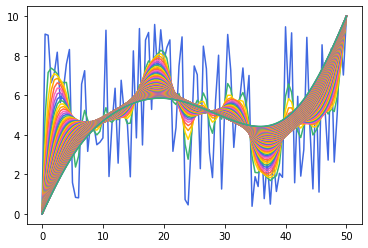

In [7]:
# Condiciones iniciales
T = np.random.uniform(0, 10, N+1)

# Condiciones de frontera
cf = (0, 10)
T[0], T[N] = cf

# FTCS
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[1:N] = T[1:N] + s * (T[0:N-1] - 2 * T[1:N] + T[2:N+1])

    # Foco en movimiento
    # T[N] = np.sin(0.5 * i) * 5 + 5

    # Condiones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)

### Tres niveles temporales, centrado en el espacio

$$
T_j^{n+1} = \frac{2s}{3} (T_{i-1}^n - 2T_i^n + T_{i+1}^n) - \frac{1}{3} T_i^{n-1} + \frac{4}{3} T_i^n
$$

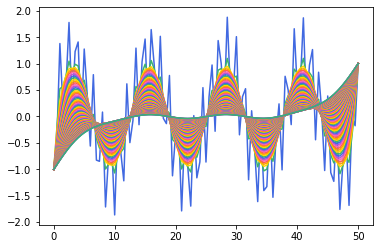

In [8]:
# Condiciones iniciales
T = np.sin(np.linspace(0, N/4, N+1)) + np.sin(np.linspace(0, N*4, N+1))

# Condiciones de frontera
cf = (-1, 1)
T[0], T[N] = cf

# Copia del vector temporal, siempre una iteración por detrás
Told = T.copy()

# Tres niveles temporales, centrado en el espacio
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[1:N] = (2/3) * s * (T[0:N-1] - 2 * T[1:N] + T[2:N+1]) - (1/3) * Told[1:N] + (4/3) * T[1:N]
    Told = T.copy()

    # Condiones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)

### Dos niveles temporales, centrado en el espacio (5 vecinos)

$$
T_i^{n+1} = T_i^n + s (-\frac{1}{12} T_{i-2}^n +\frac{4}{3} T_{i-1}^n -\frac{5}{2} T_{i}^n +\frac{4}{3} T_{i+1}^n -\frac{1}{12} T_{i+2}^n)
$$

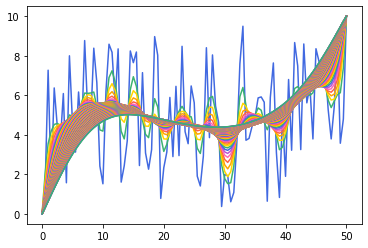

In [9]:
# Condiciones iniciales
T = np.random.uniform(0, 10, N+1)

# Condiciones de frontera
cf = (0, 10)
T[0], T[N] = cf

# Extendemos el vector hacia los dos extremos
T = np.concatenate(([T[0]], T, [T[N]]))

# 5 vecinos
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[2:-2] = T[2:-2] + s * (- (1/12) * T[0:-4] + (4/3) * T[1:-3] - (5/2) * T[2:-2] + (4/3) * T[3:-1] - (1/12) * T[4:])

    # Condiones de frontera con flujo nulo
    #T[1], T[N-1] = T[2], T[N-2]
    #T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T[1:-1])

### DuFort-Frankel (Tres niveles temporales, centrado en el espacio)

$$
T_i^{n+1} = \frac{2s}{1+2s} (T_{i-1}^n + T_{i+1}^n) + \frac{1-2s}{1+2s} T_i^{n-1}
$$

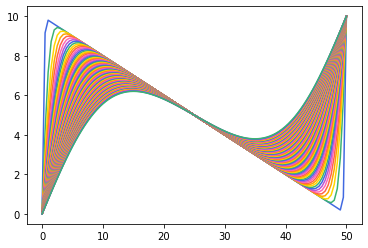

In [10]:
# Condiciones iniciales
T = np.linspace(10, 0, N+1)

# Condiciones de frontera
cf = (0, 10)
T[0], T[N] = cf

# Copia del vector temporal, siempre una iteración por detrás
Told = T.copy()

# DuFort-Frankel
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T[1:N] = (2*s)/(1+2*s) * (T[0:N-1] + T[2:N+1]) + (1-2*s)/(1+2*s) * Told[1:N]
    Told = T.copy()

    # Condiones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)

### FTCS implícito

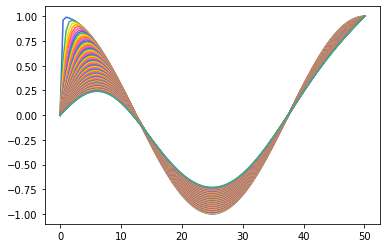

In [11]:
# Condiciones iniciales
T = np.cos(np.linspace(0, 2*np.pi, N+1))

# Condiciones de frontera
cf = (0, 1)
T[0], T[N] = cf

# Matriz de coeficientes
A = np.zeros((N+1, N+1))
for i in range(1,N):
    A[i,i] = 1 + 2*s
    A[i,i+1] = -s
    A[i,i-1] = -s
A[0,0]=1
A[N,N]=1

# Matrix inversa
Ai = np.linalg.inv(A)

# FTCS implícito
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T = np.dot(Ai, T)

    # Condiciones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)

### Crank-Nicolson

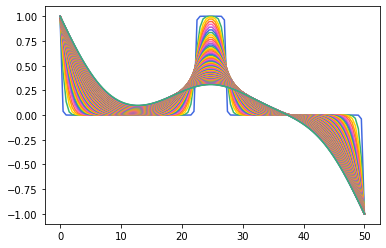

In [12]:
# Condiciones iniciales
T = np.zeros(N+1)
T[N//2-5:N//2+5] = 1

# Condiciones de frontera
cf = (1, -1)
T[0], T[N] = cf

# Matriz de coeficientes A
A = np.zeros((N+1, N+1))
for i in range(1,N):
    A[i,i] = 1 + s
    A[i,i+1] = -s/2
    A[i,i-1] = -s/2
A[0,0]=1
A[N,N]=1

# Matriz de coeficientes B
B = np.zeros((N+1, N+1))
for i in range(1,N):
    B[i,i] = 1 - s
    B[i,i+1] = s/2
    B[i,i-1] = s/2
B[0,0]=1
B[N,N]=1

# Combinación de ambas matrices
Bi = np.linalg.inv(B)
C = np.linalg.inv(np.dot(Bi, A))

# FTCS implícito
for i in range(it_t):
    # Cálculo del siguiente vector sin cambiar las condiciones de frontera
    T = np.dot(C, T)

    # Condiciones de frontera con flujo nulo
    # T[0], T[N] = T[1], T[N-1]

    # Representación cada 20 iteraciones
    if i % 20 == 0:
        plt.plot(np.linspace(0, dx*N, N+1), T)

### Resolver con cualquier método

In [75]:
def ecuacion_transporte(T_, c_frontera, x_coefs, t_coefs, N, it, dx, dt, alfa):
    T = T_.copy()

    # Condicións de frontera
    cf_flujo_nulo = c_frontera == "Flujo nulo"
    
    if not cf_flujo_nulo:
        T[0], T[N] = c_frontera

    # Estabilidad
    s = alfa * (dt/dx**2)

    # Dimensión do método (1 para 3 coeficientes, 2 para 5...)
    assert len(x_coefs) % 2 == 1, "O número de coeficientes de x ten que ser impar"
    assert len(x_coefs) >= 3, "O número de coeficientes de x ten que ser polo menos 3"
    x_n = (len(x_coefs) >> 1)
    T = np.concatenate(([T[0]] * (x_n-1), T, [T[N]] * (x_n-1)))

    # Crear varios arrays para almacear os valores pasados no tempo (0 é o actual, 1 é o anterior...)
    T = np.vstack([T] * (len(t_coefs)+1))

    # Iteración no tempo
    for i in range(it):
        # Cálculo do seguinte vector sen cambiar as condiciones de frontera
        # Suma a parte pertinente ós coeficientes temporais e os coeficientes espaciais
        T[0, x_n:-x_n] = sum([T[0, x_n+i : -x_n+i or None] * coef for i, coef in x_coefs.items()]) + sum([T[-i, x_n:-x_n] * coef for i, coef in t_coefs.items()])

        # Condiciones frontera con flujo nulo
        if cf_flujo_nulo:
            T[0, 0:x_n], T[0, -x_n:] = T[0, x_n+1], T[0, -x_n-1]

        # Propagar os cambios de atrás cara adiante
        for j in range(len(t_coefs), 0, -1):
            T[j] = T[j-1].copy()

        # Representación cada 20 iteracións
        if i % 20 == 0:
            plt.plot(np.linspace(0, dx*N, N+1), T[0, x_n-1:-x_n+1 or None])

In [76]:
def valores_iniciales(f, N, it, dx, dt, alfa):
    def wrapper(T, cf, xc, tc):
        f(T, cf, xc, tc, N, it, dx, dt, alfa)
    return wrapper

# Puntos de X
N = 100
# Iteraciones temporales
it = 2000
# Parámetros de la discretización
dx = 0.5
dt = 0.1
alfa = 0.1

ecuacion_transporte_vi = valores_iniciales(ecuacion_transporte, N, it, dx, dt, alfa)

In [77]:
# Coeficientes

coeficientes = {
    "FTCS": ({
        -1: s,
        0: 1 - 2*s,
        1: s
    }, {}),

    "Tres niveles temporales": ({
        -1: 2*s/3,
        0: (4/3)*(1 - s),
        1: 2*s/3
    }, {
        -1: -1/3
    }),

    "5 vecinos espaciales": ({
        -2: -s/12,
        -1: 4*s/3,
        0: 1 - 5*s/2,
        1: 4*s/3,
        2: -s/12
    }, {}),

    "DuFort-Frankel": ({
        -1: (2*s)/(1 + 2*s),
        0: 0,
        1: (2*s)/(1 + 2*s)
    }, {
        -1: (1 - 2*s)/(1 + 2*s)
    }),
}

FTCS


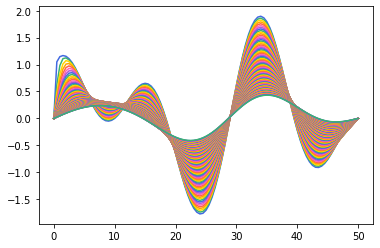

Tres niveles temporales


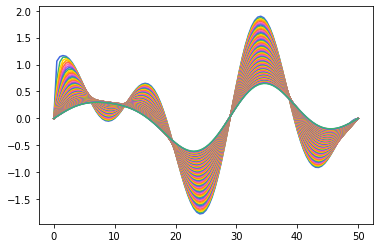

5 vecinos espaciales


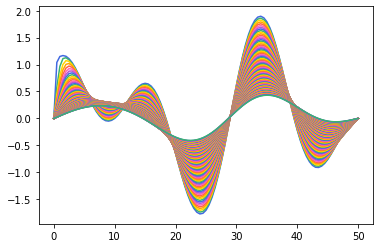

DuFort-Frankel


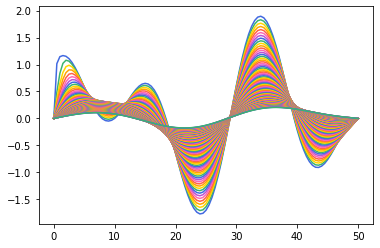

In [81]:
T = np.cos(np.linspace(0, 6*np.pi, N+1)) + np.sin(np.linspace(0, 3*np.pi + 0.5*np.pi, N+1))
cf = (0, 0)

for c in coeficientes:
    print(c)
    ecuacion_transporte_vi(T, cf, *coeficientes[c])
    plt.show()